In [6]:
"""
Une chaîne de restauration rapide prévoit d'ajouter un nouvel article à son menu.
Cependant, elle hésite encore entre trois campagnes marketing possibles pour promouvoir ce nouveau produit.
Afin de déterminer quelle promotion a le plus grand impact sur les ventes, 
le nouvel article est introduit dans plusieurs établissements situés sur des marchés sélectionnés aléatoirement.
Une promotion différente est utilisée dans chaque établissement, et 
les ventes hebdomadaires du nouveau produit sont enregistrées pendant les quatre premières semaines.
""" 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [3]:
df = pd.read_csv("/Users/sammyeyong/Documents/Data Analysis Projects/A:B Testing of Fast Food Marketing Campaign/WA_Marketing-Campaign.csv.xls") 

# Grouping data by Promotion and MarketSize
Market = df.groupby(["Promotion", "MarketSize"]).size().reset_index(name="Count")

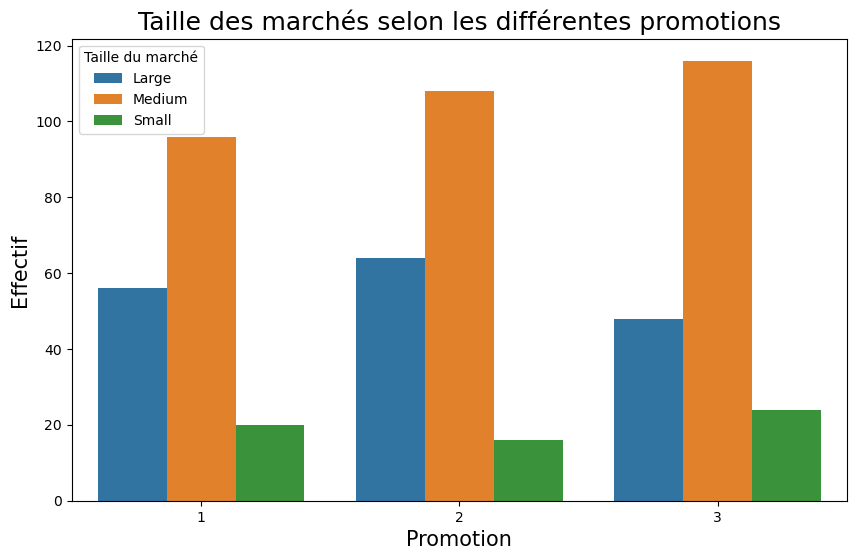

"\nHere we see that the medium market size occupies the \nmost among all three promotion groups, \nwhile the small market size occupies the least.\nNow I'm going to explore the AgeOfStore column:\n"

In [4]:
# Visualizing Market sizes across different promotions
plt.figure(figsize=(10, 6)) 
sns.barplot(x="Promotion", y="Count", hue="MarketSize", data=Market) 
plt.xlabel("Promotion", fontsize=15) 
plt.ylabel("Effectif", fontsize=15) 
plt.title("Taille des marchés selon les différentes promotions", fontsize=18) 
plt.legend(title="Taille du marché")
plt.show() 

"""
Here we see that the medium market size occupies the 
most among all three promotion groups, 
while the small market size occupies the least.
Now I'm going to explore the AgeOfStore column:
"""


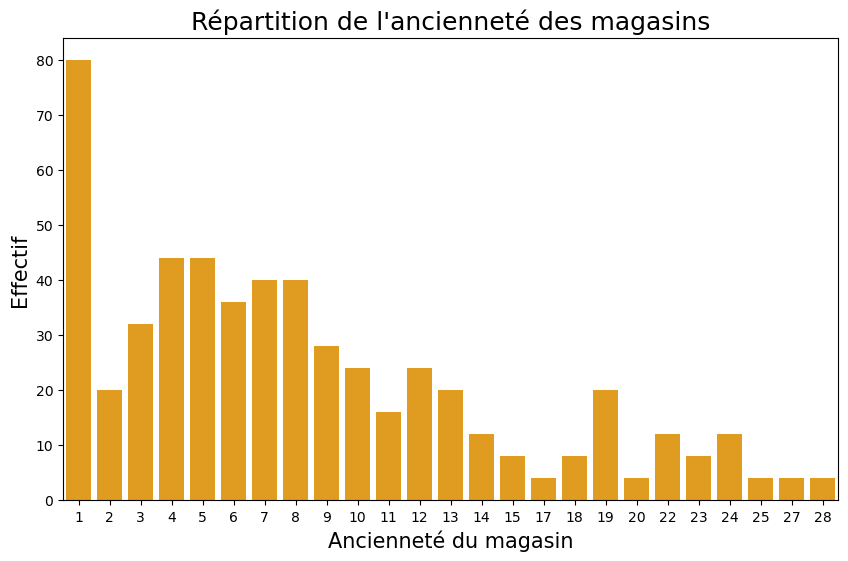

In [5]:
# Grouping data by AgeOfStore 
Age = df.groupby("AgeOfStore").size().reset_index(name="Count") 

# Visualizing Store Age Distribution 
plt.figure(figsize=(10, 6)) 
sns.barplot(x="AgeOfStore", y="Count", data=Age, color="orange") 
plt.xlabel("Ancienneté du magasin", fontsize=15) 
plt.ylabel("Effectif", fontsize=15) 
plt.title("Répartition de l'ancienneté des magasins", fontsize=18) 
plt.show()

In [8]:
"""
La majorité des magasins ont 10 ans ou moins.
Un grand nombre de magasins ont 1 an.
Examinons l’ancienneté des magasins dans les différents groupes de promotion.
À cette fin, j’appliquerai une fonction ou une opération 
(un résumé dans mon cas) sur un sous-ensemble du vecteur (ÂgeDuMagasin), 
réparti selon une variable factorielle donnée (Promotion).
"""

# Summary statistics for AgeOfStore per Promotion
summary_stats = df.groupby("Promotion")["AgeOfStore"].describe()
print(summary_stats)

           count      mean       std  min  25%  50%   75%   max
Promotion                                                      
1          172.0  8.279070  6.636160  1.0  3.0  6.0  12.0  27.0
2          188.0  7.978723  6.597648  1.0  3.0  7.0  10.0  28.0
3          188.0  9.234043  6.651646  1.0  5.0  8.0  12.0  24.0


In [9]:

"""
Nous observons que les trois groupes semblent présenter des profils d’ancienneté des magasins.
Les âges moyens (Moyenne) des magasins pour les trois groupes sont de 8 à 9 ans,
et la majorité des magasins ont 10 à 12 ans ou moins.
Après avoir exploré la distribution des variables dans les trois groupes de promotion,
je peux vérifier que les groupes d’échantillons sont similaires
et que les résultats des tests A/B seront significatifs et fiables.
""" 

# Extracting sales data for each promotion group 
promo_1 = df[df["Promotion"] == 1]["SalesInThousands"] 
promo_2 = df[df["Promotion"] == 2]["SalesInThousands"] 
promo_3 = df[df["Promotion"] == 3]["SalesInThousands"] 

# Computing mean, standard deviation, and sample size
mean_1, std_1, n_1 = promo_1.mean(), promo_1.std(), len(promo_1)
mean_2, std_2, n_2 = promo_2.mean(), promo_2.std(), len(promo_2)
mean_3, std_3, n_3 = promo_3.mean(), promo_3.std(), len(promo_3)

# Performing t-tests
t_stat_1_2, p_value_1_2 = ttest_ind(promo_1, promo_2, equal_var=False)
t_stat_1_3, p_value_1_3 = ttest_ind(promo_1, promo_3, equal_var=False)
t_stat_2_3, p_value_2_3 = ttest_ind(promo_2, promo_3, equal_var=False) 

# Printing results
print(f"T-test between Promotion 1 and 2: t-stat = {t_stat_1_2:.3f}, p-value = {p_value_1_2:.3f}")
print(f"T-test between Promotion 1 and 3: t-stat = {t_stat_1_3:.3f}, p-value = {p_value_1_3:.3f}")
print(f"T-test between Promotion 2 and 3: t-stat = {t_stat_2_3:.3f}, p-value = {p_value_2_3:.3f}")

# Printing means for reference
print(f"Mean Sales for Promotion 1: {mean_1:.2f}")
print(f"Mean Sales for Promotion 2: {mean_2:.2f}")
print(f"Mean Sales for Promotion 3: {mean_3:.2f}")

T-test between Promotion 1 and 2: t-stat = 6.428, p-value = 0.000
T-test between Promotion 1 and 3: t-stat = 1.556, p-value = 0.121
T-test between Promotion 2 and 3: t-stat = -4.881, p-value = 0.000
Mean Sales for Promotion 1: 58.10
Mean Sales for Promotion 2: 47.33
Mean Sales for Promotion 3: 55.36


In [10]:
"""
Recommandation finale :
Les promotions 1 et 3 sont les meilleures options, 
car leurs performances sont similaires et elles surpassent toutes deux nettement la promotion 2.
L’entreprise ne devrait pas utiliser la promotion 2, 
car elle entraîne des ventes bien inférieures à celles des deux autres.
Si l’entreprise doit en choisir une seule, 
la promotion 1 génère légèrement plus de ventes que la promotion 3.
"""

'\nRecommandation finale :\nLes promotions 1 et 3 sont les meilleures options, \ncar leurs performances sont similaires et elles surpassent toutes deux nettement la promotion 2.\nL’entreprise ne devrait pas utiliser la promotion 2, \ncar elle entraîne des ventes bien inférieures à celles des deux autres.\nSi l’entreprise doit en choisir une seule, \nla promotion 1 génère légèrement plus de ventes que la promotion 3.\n'